In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
color_map = "Accent"

ESQUERDA = False
DIREITA = True

NORMAL = 8
TEMPERADO = 1
QUEBRADO = 6
SUCESSO = 5

In [3]:
def gerar_ponte(n_pares = 18):
    vidros = [True, False]
    ponte = []
    
    for i in range(n_pares):
        ponte.append(random.choice(vidros))
        
    ponte_vidros = []
    
    for i in range(len(ponte)):
        if ponte[i] is True:
            ponte_vidros.append([TEMPERADO, NORMAL])
        else:
            ponte_vidros.append([NORMAL, TEMPERADO])
    
    ponte_vidros = np.array(ponte_vidros).T
    
    return ponte, ponte_vidros

def plotar_ponte(ponte_vidros, color_map, mortes):
    fig, ax = plt.subplots()
    
    ax.pcolormesh(ponte_vidros, edgecolors='w', linewidth=1, cmap = color_map)
    plt.title(f"Mortes = {mortes}", fontsize=20)
    fig.set_dpi(150)
    ax = plt.gca()
    ax.set_aspect('equal')

def simular_caminhada(ponte, ponte_vidros, color_map, plotar=True):
    vidro_atual = 0
    mortes = 0
    
    while vidro_atual != 18 and mortes != 16:
        escolhas = [ESQUERDA, DIREITA]
        decisao = random.choice(escolhas)
        
        if ponte[vidro_atual] == decisao:
            ponte_vidros[int(not(decisao))][vidro_atual] = SUCESSO
            vidro_atual += 1
        else:
            ponte_vidros[int(not(decisao))][vidro_atual] = QUEBRADO
            vidro_atual += 1
            mortes += 1
            
        if plotar == True:
            plotar_ponte(ponte_vidros, color_map, mortes)
            
    return mortes
    

7

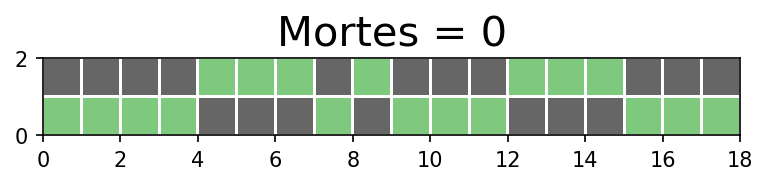

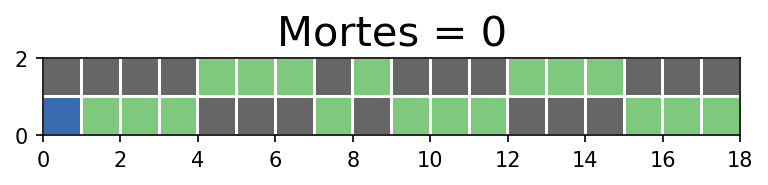

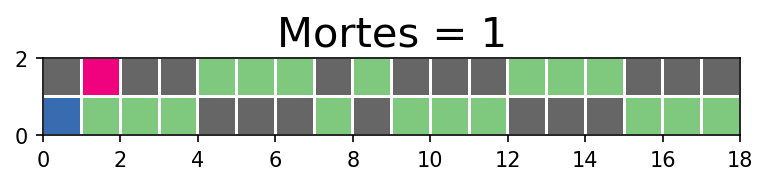

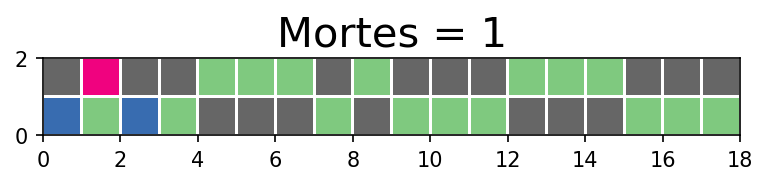

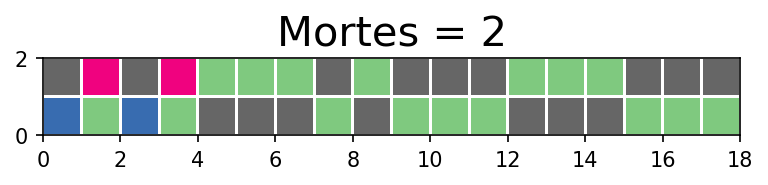

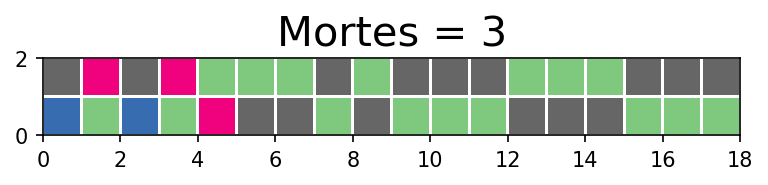

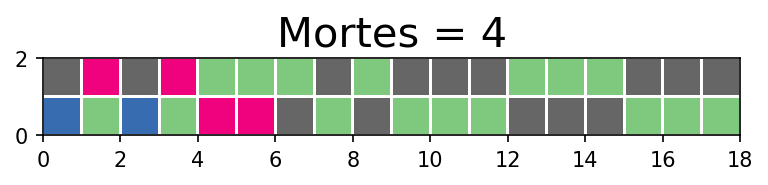

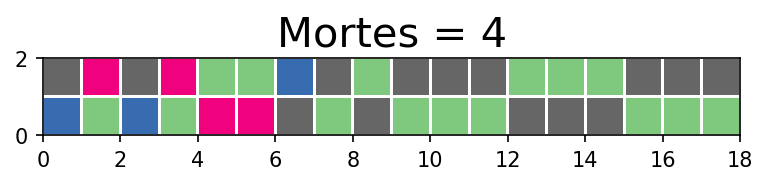

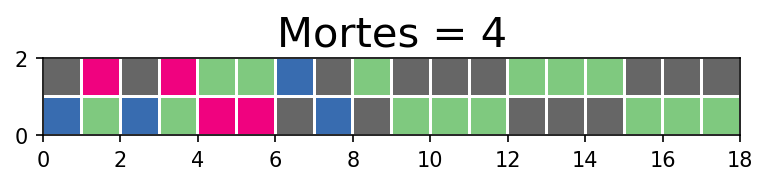

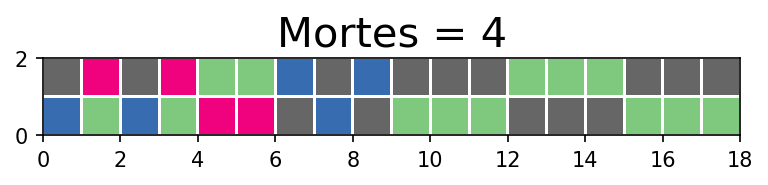

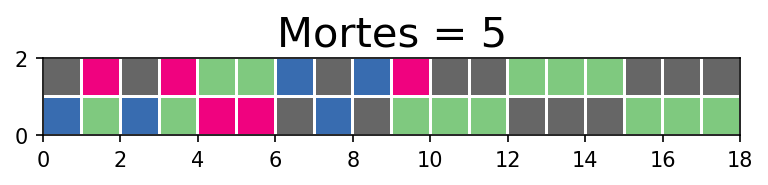

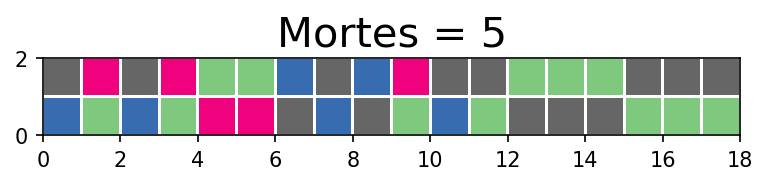

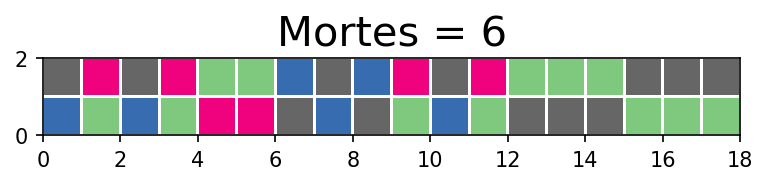

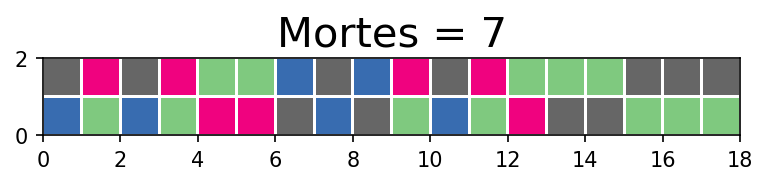

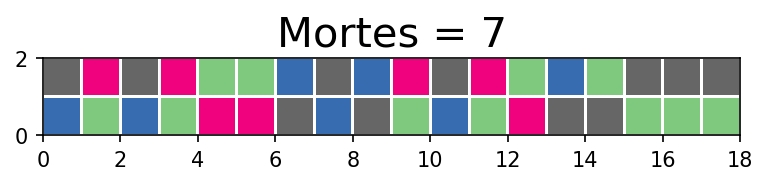

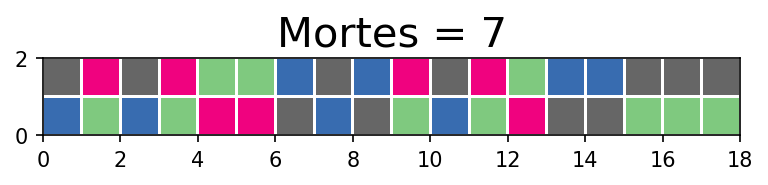

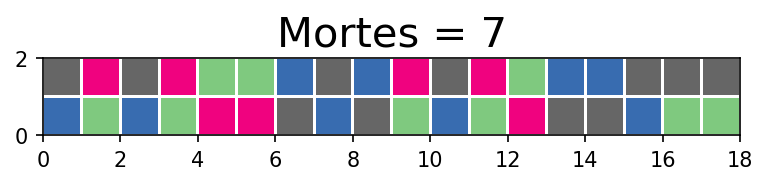

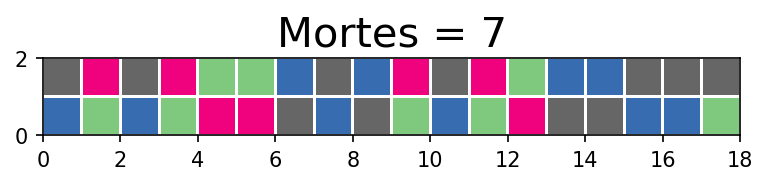

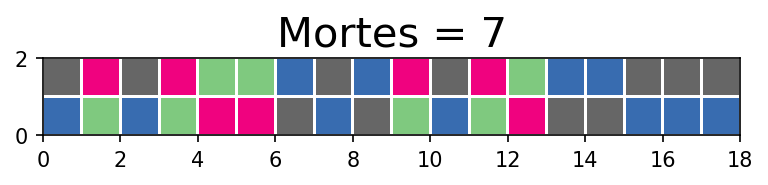

In [4]:
ponte, ponte_vidros = gerar_ponte()
plotar_ponte(ponte_vidros, color_map, 0)
n_mortes = simular_caminhada(ponte, ponte_vidros, color_map)
n_mortes

In [5]:
quant_mortes = []
mortes_contagem = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0,
    10: 0,
    11: 0,
    12: 0,
    13: 0,
    14: 0,
    15: 0,
    16: 0
}

for i in range(1000000):
    ponte, ponte_vidros = gerar_ponte()
    n_mortes = simular_caminhada(ponte, ponte_vidros, color_map, plotar=False)
    quant_mortes.append(n_mortes)
    mortes_contagem[n_mortes] += 1

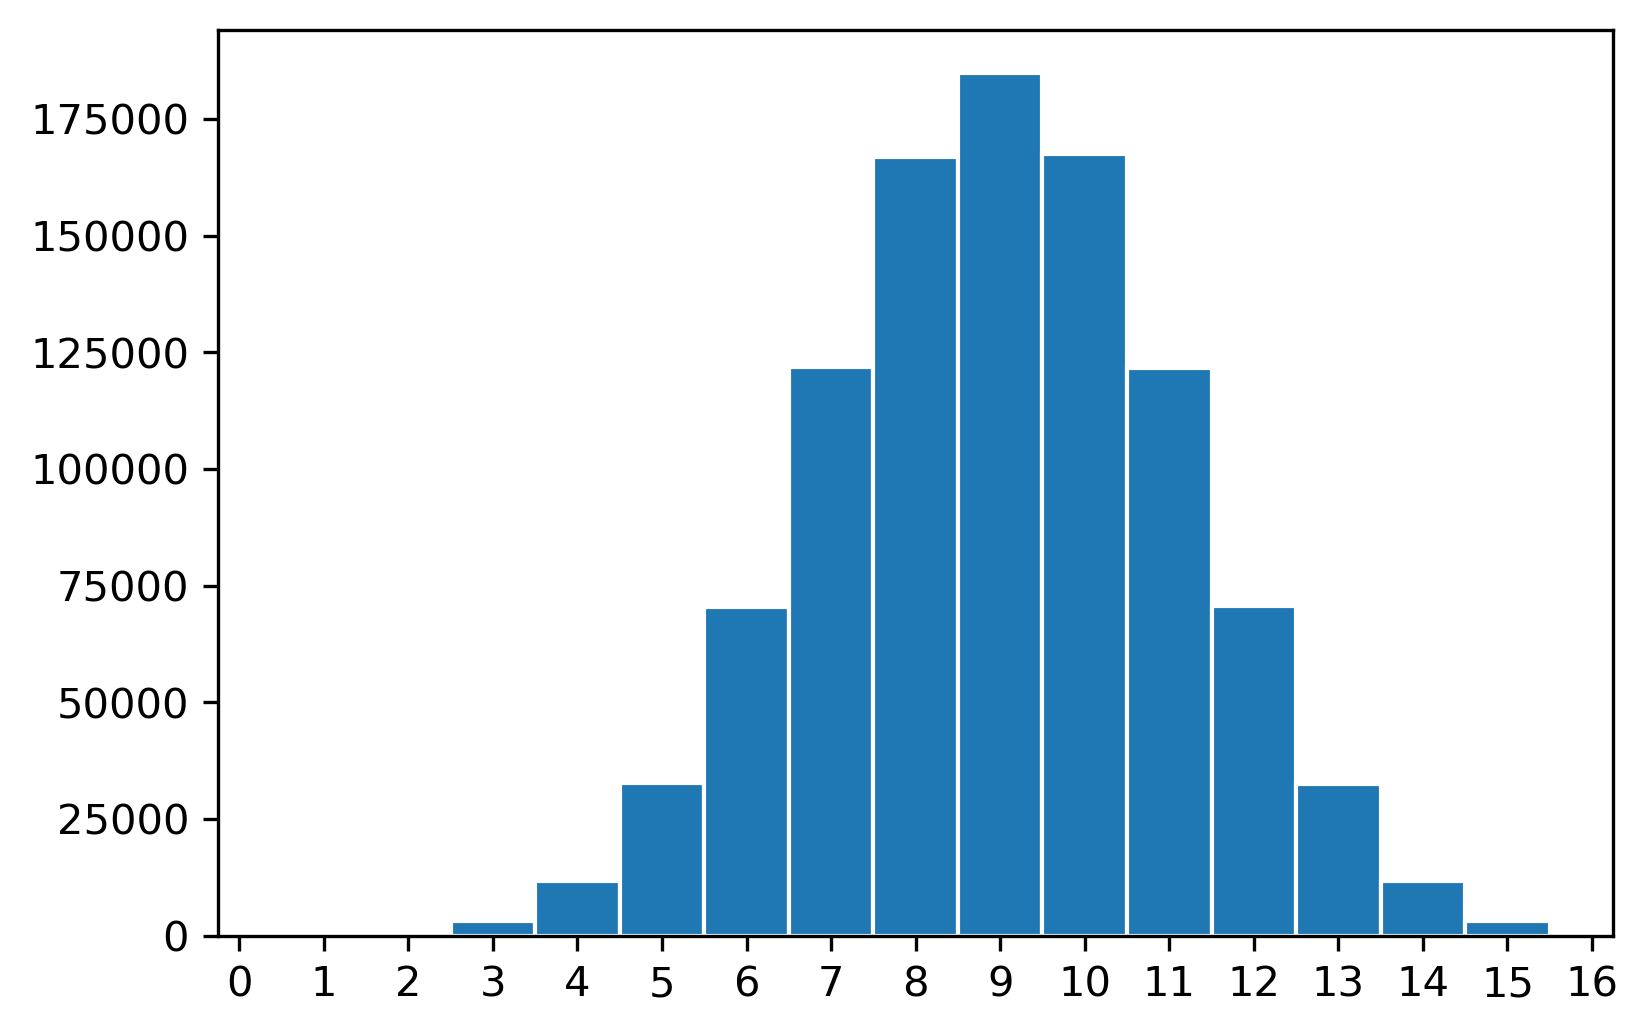

In [10]:
x = np.arange(0, 17)
fig, ax = plt.subplots()
fig.set_dpi(300)
ax.hist(quant_mortes, bins=np.arange(1,17)-0.5, ec="w")
plt.xticks(x)
plt.show()

In [7]:
mortes_contagem

{0: 3,
 1: 67,
 2: 556,
 3: 3082,
 4: 11777,
 5: 32646,
 6: 70355,
 7: 121892,
 8: 166820,
 9: 184880,
 10: 167535,
 11: 121602,
 12: 70635,
 13: 32575,
 14: 11774,
 15: 3175,
 16: 626}

In [8]:
probabilidades = []

soma = 0

for index in mortes_contagem:
    soma += mortes_contagem[index]
    probabilidades.append((soma/1000000)*100)

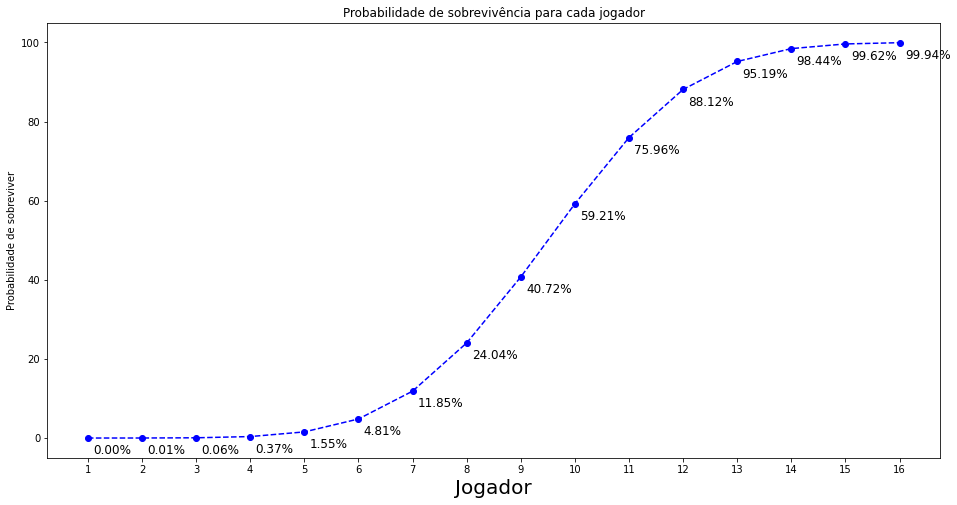

In [17]:
x = np.arange(1, 17)

plt.figure(figsize=(16,8))

plt.title("Probabilidade de sobrevivência para cada jogador")
plt.plot(x, probabilidades[:-1], '--bo')
plt.ylabel("Probabilidade de sobreviver")
plt.xlabel("Jogador", fontsize=20)
plt.xticks(x)

for i in range(16):
    plt.annotate(f"{probabilidades[i]:.2f}%", (x[i], probabilidades[i]), xytext=(x[i]+0.1, probabilidades[i]-4), fontsize=12)
    
plt.show()